In [3]:
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

after using the `simulation.sh` with the following configuration for the ARM Cortex A7:
```bash
#!/bin/sh
## pour cortex A07
M=( 1 2 4 8 16 32 64 )  # taille de matrice
N=( 1 2 4 8 16 32 64 )  # nombre de thread = nombre de cpu

rm RES_Q5.log
for m in ${M[@]}
do
    for n in ${N[@]}
    do
        if ((n<=m))
        then
            path/gem5-stable/build/ARM/gem5.fast 
            path/gem5-stable/configs/example/se.py -n $n 
            -c path/test_omp 
            -o "$n $m" 
            --cpu-type=arm_detailed --caches --l2cache 
            --num-l2caches=1 --cacheline_size=32 
            --l1d_size="32kB" --l1d_assoc=2 
            --l1i_size="32kB" --l1i_assoc=2 
            --l2_size="512kB" --l2_assoc=8
            numCycle=$(sed -n 's/system\.cpu0*\.numCycles\s\+\([0-9]\+\).*/\1/p' m5out/stats.txt)
            simInsts=$(sed -n 's/sim_insts\s\+\([0-9]\+\).*/\1/p' m5out/stats.txt)
            echo "$m,$n,_,$numCycle,$simInsts" >> RES_Q5.log
        fi
    done
done
```
where `path = /home/g/gac/ES201/tools/TP5` and can change with your charge travail dirigée.

during simulation the matrix size of 128 does not return results so it was removed.

### Question 5
Pour chaque configuration, quel est le nombre de cycles d’exécution de l’application ? Vous pourrez présenter vos résultats sous forme de graphe 2 axes.

In [4]:
df = pd.read_csv('Q5.csv',names=['M','N','N_CYCLES','N_INSTS']).fillna(0)
dfs = dict(tuple(df.groupby('M')))

df_null = df.loc[df['N_CYCLES'] == 0]
df_nonNull = df.loc[df['N_CYCLES'] != 0]

<Figure size 640x480 with 0 Axes>

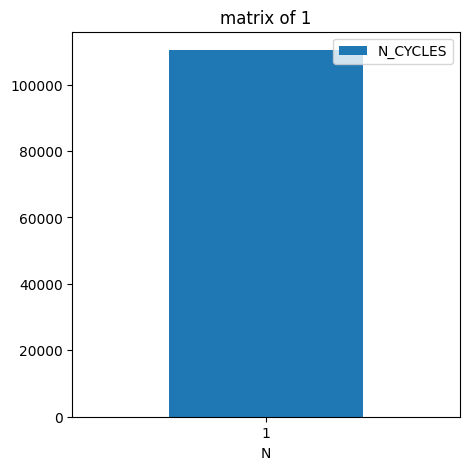

<Figure size 640x480 with 0 Axes>

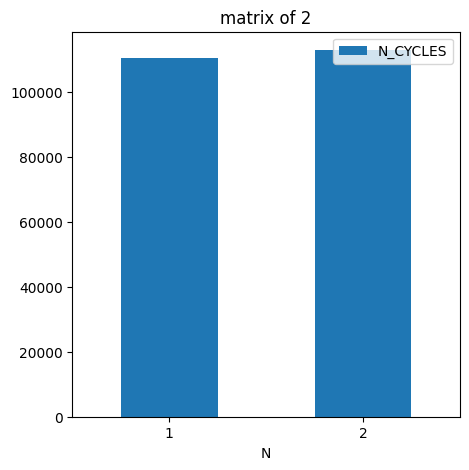

<Figure size 640x480 with 0 Axes>

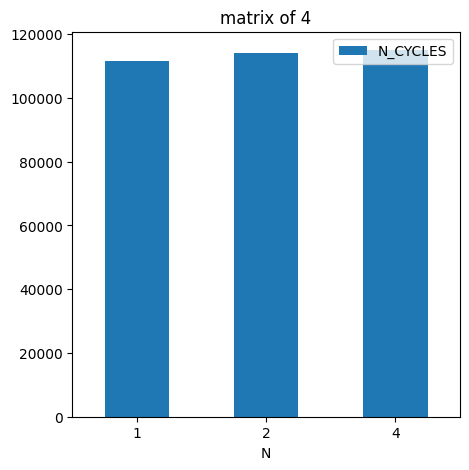

<Figure size 640x480 with 0 Axes>

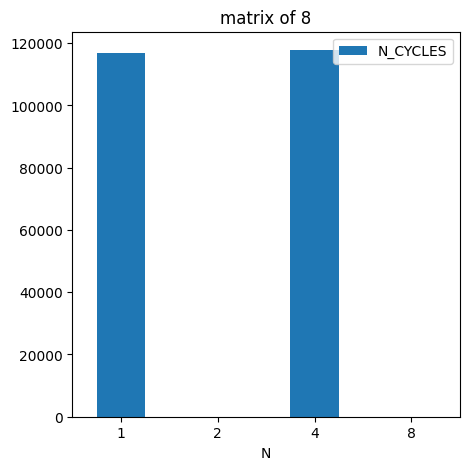

<Figure size 640x480 with 0 Axes>

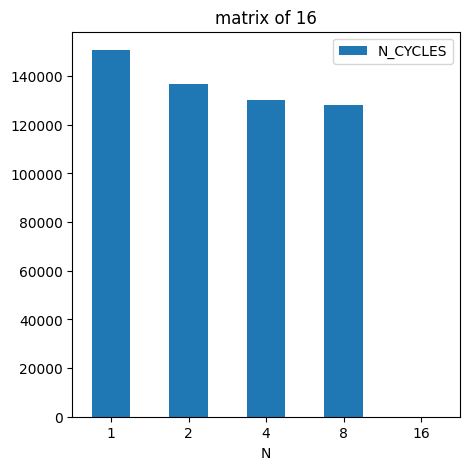

<Figure size 640x480 with 0 Axes>

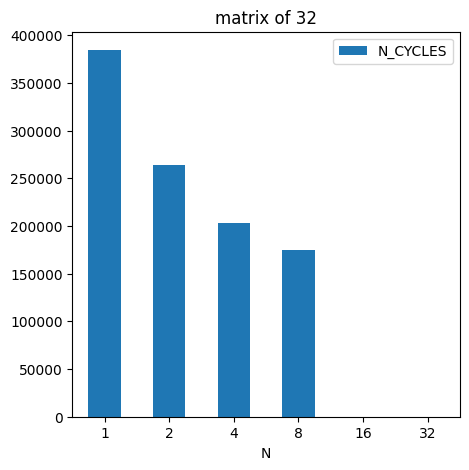

<Figure size 640x480 with 0 Axes>

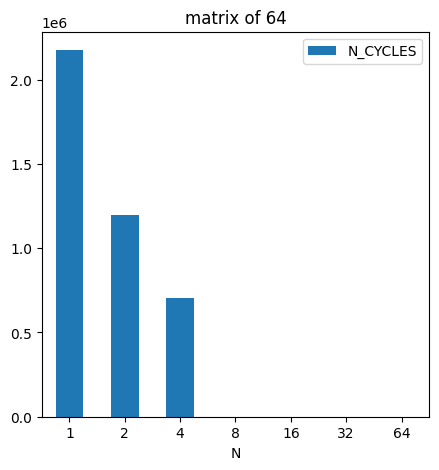

<Figure size 640x480 with 0 Axes>

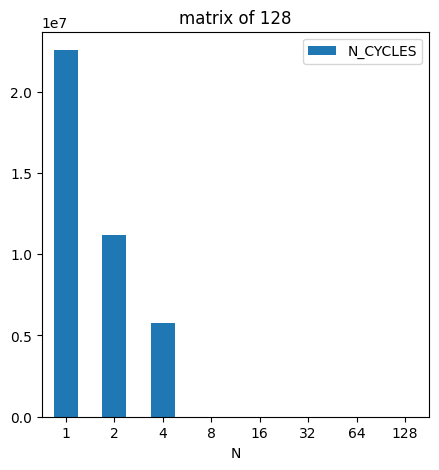

In [5]:
def plotData(df, xLabel:str, yLabel:str, size:int, style: str = 'bar'):
    plt.figure()
    plot = df.plot(x=xLabel, y=yLabel, kind=style, title=f'matrix of {size}', rot=0, figsize=(5,5))
    plt.show()

    fig = plot.get_figure()
    fig.savefig(f'./images/{yLabel}_{size}.png')


def dfsPlot(dfs, dataLabels:list):
    for data in dataLabels:
        for size in dfs.keys():
            plotData(dfs[size], 'N', data, size)


dfsPlot(dfs, ['N_CYCLES'])

### Question 6
Déduire le speedup par rapport à la configuration à 1 thread.

### Question 7
En utilisant le nombre total d’instructions simulées, déterminez quelle est la valeur maximale de l’IPC pour chaque configuration ?

In [66]:
x = pd.DataFrame([x for i, x in df.iterrows() if x['N'] == 1])
speed_up = list()
ipc = list()

for i, v in df.iterrows():
    if (v['N_CYCLES'] == 0):
        ipc.append(0)
    else:
        ipc.append(v['N_INSTS'] / v['N_CYCLES'])
    for j, k in x.iterrows():
        if (v['M'] == k['M']):
            if(v['N_CYCLES']==0):
                speed_up.append(0)
            else:
                speed_up.append(k['N_CYCLES']/v['N_CYCLES'])

df['SPEED_UP'] = speed_up
df['IPC'] = ipc


# dfsPlot(dict(tuple(df.groupby('M'))), ['SPEED_UP', 'IPC'])


def getMax(df, group:str, var:str):
    dfs = dict(tuple(df.groupby(group)))
    maxArray = list()


    for size in dfs.keys():
        maxLocal = dfs[size].query(f'{var} == {var}.max()')

        maxArray.append(
            [maxLocal['M'].values[0], maxLocal['N'].values[0], maxLocal[var].values[0]]
        )

    print(f'M & N & {var}\\\\')
    print('\\hline\\hline')
    for row in range(len(maxArray)):
        if maxArray[row][2] > 1e4:
            print(f'{maxArray[row][0]:3.0f} & {maxArray[row][1]:3.0f} & {maxArray[row][2]:1.4e}\\\\')
        else:
            print(f'{maxArray[row][0]:3.0f} & {maxArray[row][1]:3.0f} & {maxArray[row][2]:2.6f}\\\\')
    print('\\hline')


getMax(df, 'N','IPC')

M & N & IPC\\
\hline\hline
 64 &   1 & 1.888479\\
 64 &   2 & 3.445187\\
 64 &   4 & 5.908364\\
 32 &   8 & 3.817405\\
 16 &  16 & 0.000000\\
 32 &  32 & 0.000000\\
 64 &  64 & 0.000000\\
128 & 128 & 0.000000\\
\hline
